In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In C:\Users\Thousif khan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Thousif khan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Thousif khan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Thousif khan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Thousif khan\Anaconda3\lib\site-packages\matplotlib\

In [2]:
import os 
os.chdir("C:\\Users\\Thousif khan\\Desktop\\Machine Learning\\KAGGLE_DATASETS")
os.getcwd()
#os.listdir()

'C:\\Users\\Thousif khan\\Desktop\\Machine Learning\\KAGGLE_DATASETS'

In [3]:
df1 = pd.read_csv("datasets_Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape

(13320, 9)

In [5]:
df1["area_type"].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df1.groupby("area_type")["area_type"].count()
#df1.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [8]:
df2 = df1.drop(['area_type', 'availability', 'society', 'balcony'], axis=1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


### Data cleaning

In [9]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
## percentage of data still remains after dropping the null values in the data
## here we can prceed with the data that which still remains more than the 99 percentage of the original data
data = (df3.size/df2.size)*100
data

99.44444444444444

In [12]:
df3.shape

(13246, 5)

In [13]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
# Note:
# you will split this strings and convert it in to the integer format
a = df3["size"][0].split(' ')
b = df3["size"][0].split(' ')[0]
print(a,"\n",int(str(a[0])))
print(b,"\n",int(b))
print(type(a),type(b))

['2', 'BHK'] 
 2
2 
 2
<class 'list'> <class 'str'>


In [15]:
df3["bhk"]=df3["size"].apply(lambda x: int(x.split(' ')[0]))

C:\Users\Thousif khan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [17]:
df3["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [18]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [19]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [21]:
df3[~df3["total_sqft"].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [22]:
def convert_sqft_to_num(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [23]:
convert_sqft_to_num('2166')

2166.0

In [24]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [25]:
convert_sqft_to_num('34.46Sq. Meter')

In [26]:
df4=df3.copy()
df4["total_sqft"]=df3["total_sqft"].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [27]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [28]:
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


### Feature Engineering:

In [29]:
df5 = df4.copy()
df5["price_per_sqft"]=df5["price"]*100000/df5["total_sqft"]
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [30]:
# total locations in the column "location" i.e.,categorical feature 
len(df5.location.unique())

1304

In [31]:
df5.location = df5.location.apply(lambda x: x.strip())

location_stats = df5.groupby("location")["location"].agg("count").sort_values(ascending=False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [32]:
len(location_stats[location_stats<=10])

1052

In [33]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [34]:
print(len(df5.location.unique()))

1293


In [35]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [36]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [37]:
np.mean(df5.price_per_sqft)

7920.759149939642

### Outliers Detection:

In [38]:
df5[df5.total_sqft/df5.bhk < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [39]:
df5.shape

(13246, 7)

In [40]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [41]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [42]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby("location"):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

In [43]:
df7[df7.location == "HSR Layout"].shape

(44, 7)

In [44]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams["figure.figsize"] = [12,10]
    plt.scatter(bhk2.total_sqft, bhk2.price_per_sqft, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price_per_sqft, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area", size=20)
    plt.ylabel("price Per Square Feet Area", size=20)
    plt.title("location", size=30)
    plt.legend()

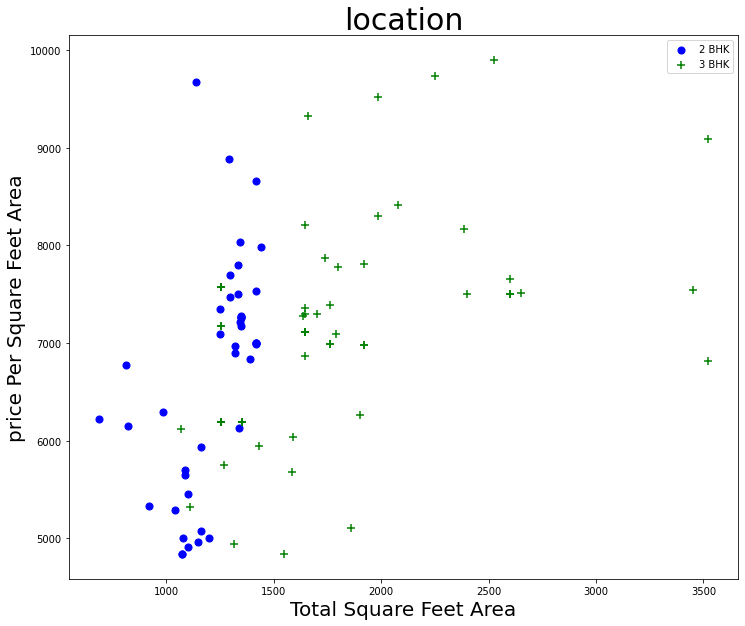

In [45]:
plot_scatter_chart(df7,"Hebbal")

In [46]:
# refernce code for the following code
for location, location_df in df7.groupby('location'):
    print(location,"\n")
    print(location_df,"\n")
    exclude_indices = np.array([])
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
        print(bhk,"\n")
        print(bhk_df,"\n")
        bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        
    print(bhk_stats,"\n")
    for bhk, bhk_df in location_df.groupby("bhk"):
        stats = bhk_stats.get(bhk-1)
        #print(stats)
        if stats and stats['count'] > 5:
            #print(stats)
            #print(stats['count'])
            exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
            print('exclude_indices: ',exclude_indices)
        #print(bhk_stats.get(bhk-1))

1st Block Jayanagar 

              location   size  total_sqft  bath  price  bhk  price_per_sqft
0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0    4    15017.543860
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3    11901.840491
2  1st Block Jayanagar  3 BHK      1875.0   2.0  235.0    3    12533.333333
3  1st Block Jayanagar  3 BHK      1200.0   2.0  130.0    3    10833.333333
4  1st Block Jayanagar  2 BHK      1235.0   2.0  148.0    2    11983.805668
5  1st Block Jayanagar  4 BHK      2750.0   4.0  413.0    4    15018.181818
6  1st Block Jayanagar  4 BHK      2450.0   4.0  368.0    4    15020.408163 

2 

              location   size  total_sqft  bath  price  bhk  price_per_sqft
4  1st Block Jayanagar  2 BHK      1235.0   2.0  148.0    2    11983.805668 

3 

              location   size  total_sqft  bath  price  bhk  price_per_sqft
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3    11901.840491
2  1st Block Jayanagar  3 BHK      1875.0   2.0  235.0

44  5th Block Hbr Layout  2 BHK      1100.0   2.0   48.0    2     4363.636364 

3 

                location   size  total_sqft  bath  price  bhk  price_per_sqft
42  5th Block Hbr Layout  3 BHK      1270.0   2.0   70.0    3     5511.811024 

5 

                location       size  total_sqft  bath  price  bhk  \
45  5th Block Hbr Layout  5 Bedroom      3600.0   5.0  130.0    5   

    price_per_sqft  
45     3611.111111   

6 

                location   size  total_sqft  bath  price  bhk  price_per_sqft
46  5th Block Hbr Layout  6 BHK      5100.0   5.0  300.0    6     5882.352941 

{2: {'mean': 4755.410708222867, 'std': 374.06419031565235, 'count': 3}, 3: {'mean': 5511.811023622047, 'std': 0.0, 'count': 1}, 5: {'mean': 3611.1111111111113, 'std': 0.0, 'count': 1}, 6: {'mean': 5882.35294117647, 'std': 0.0, 'count': 1}} 

5th Phase JP Nagar 

              location   size  total_sqft  bath  price  bhk  price_per_sqft
47  5th Phase JP Nagar  2 BHK      1075.0   2.0   60.0    2     5581.3

237     3666.666667   

1 

               location   size  total_sqft  bath  price  bhk  price_per_sqft
192  8th Phase JP Nagar  1 BHK       451.0   1.0   29.9    1     6629.711752
206  8th Phase JP Nagar  1 BHK       500.0   1.0   31.0    1     6200.000000
213  8th Phase JP Nagar  1 BHK       500.0   1.0   30.0    1     6000.000000
226  8th Phase JP Nagar  1 BHK       500.0   1.0   33.0    1     6600.000000 

2 

               location   size  total_sqft  bath   price  bhk  price_per_sqft
191  8th Phase JP Nagar  2 BHK      1073.5   2.0  54.005    2     5030.740568
194  8th Phase JP Nagar  2 BHK      1062.0   2.0  42.470    2     3999.058380
197  8th Phase JP Nagar  2 BHK       871.0   2.0  55.000    2     6314.580941
198  8th Phase JP Nagar  2 BHK      1098.0   2.0  43.910    2     3999.089253
201  8th Phase JP Nagar  2 BHK      1080.0   2.0  38.000    2     3518.518519
202  8th Phase JP Nagar  2 BHK      1059.0   2.0  34.500    2     3257.790368
203  8th Phase JP Nagar  2 BHK     

344  Akshaya Nagar      2 BHK       900.0   2.0   45.0    2     5000.000000 

2 

          location   size  total_sqft  bath  price  bhk  price_per_sqft
298  Akshaya Nagar  2 BHK      1388.0   2.0   57.0    2     4106.628242
299  Akshaya Nagar  2 BHK      1070.0   2.0   54.0    2     5046.728972
300  Akshaya Nagar  2 BHK      1280.0   2.0   58.0    2     4531.250000
309  Akshaya Nagar  2 BHK      1280.0   2.0   60.0    2     4687.500000
314  Akshaya Nagar  2 BHK      1280.0   2.0   60.0    2     4687.500000
315  Akshaya Nagar  2 BHK      1200.0   2.0   50.0    2     4166.666667
316  Akshaya Nagar  2 BHK      1092.0   2.0   60.0    2     5494.505495
321  Akshaya Nagar  2 BHK      1314.0   2.0   68.8    2     5235.920852
323  Akshaya Nagar  2 BHK      1265.0   2.0   67.0    2     5296.442688
324  Akshaya Nagar  2 BHK      1126.0   2.0   55.0    2     4884.547069
333  Akshaya Nagar  2 BHK      1300.0   2.0   54.0    2     4153.846154
335  Akshaya Nagar  2 BHK      1113.0   2.0   52.0    

3 

       location       size  total_sqft  bath  price  bhk  price_per_sqft
414  Anandapura      3 BHK      1576.0   3.0   59.1    3     3750.000000
422  Anandapura      3 BHK      1576.0   3.0   58.0    3     3680.203046
426  Anandapura  3 Bedroom      1200.0   2.0   66.0    3     5500.000000
427  Anandapura  3 Bedroom      1415.0   2.0   74.0    3     5229.681979
430  Anandapura      3 BHK      1576.0   3.0   58.7    3     3724.619289 

4 

       location       size  total_sqft  bath  price  bhk  price_per_sqft
420  Anandapura  4 Bedroom      1749.0   4.0   90.0    4     5145.797599 

{2: {'mean': 4335.741837049204, 'std': 710.6695705040866, 'count': 14}, 3: {'mean': 4376.900862764794, 'std': 811.4741024839058, 'count': 5}, 4: {'mean': 5145.797598627787, 'std': 0.0, 'count': 1}} 

exclude_indices:  [414. 422. 430.]
Ananth Nagar 

         location   size  total_sqft  bath  price  bhk  price_per_sqft
431  Ananth Nagar  1 BHK       500.0   1.0  14.00    1     2800.000000
432  Ananth 

530  Arekere  4 BHK      2710.0   6.0  142.0    4     5239.852399 

{1: {'mean': 4666.666666666667, 'std': 0.0, 'count': 1}, 2: {'mean': 4884.730750645279, 'std': 371.1132245946985, 'count': 6}, 3: {'mean': 5822.747277384037, 'std': 695.6480303741811, 'count': 3}, 4: {'mean': 5239.852398523985, 'std': 0.0, 'count': 1}} 

exclude_indices:  []
Attibele 

     location       size  total_sqft  bath   price  bhk  price_per_sqft
533  Attibele      1 BHK       450.0   1.0   11.00    1     2444.444444
534  Attibele  4 Bedroom      1600.0   4.0   52.80    4     3300.000000
535  Attibele      2 BHK       656.0   2.0   25.00    2     3810.975610
536  Attibele      1 BHK       400.0   1.0   11.00    1     2750.000000
537  Attibele      1 BHK       400.0   1.0   12.00    1     3000.000000
538  Attibele      1 BHK       400.0   1.0   14.00    1     3500.000000
539  Attibele      1 BHK       500.0   1.0   17.00    1     3400.000000
540  Attibele  4 Bedroom      2168.0   4.0   95.00    4     4381.9188

exclude_indices:  [617. 618. 620. 624. 627. 633.]
Badavala Nagar 

           location   size  total_sqft  bath   price  bhk  price_per_sqft
638  Badavala Nagar  3 BHK      1494.0   2.0   94.55    3     6328.647925
639  Badavala Nagar  2 BHK      1274.0   2.0   81.00    2     6357.927786
640  Badavala Nagar  3 BHK      1842.0   3.0  115.00    3     6243.213898
641  Badavala Nagar  3 BHK      1494.0   2.0   94.55    3     6328.647925
642  Badavala Nagar  2 BHK      1274.0   2.0   81.00    2     6357.927786
643  Badavala Nagar  3 BHK      1494.0   2.0   94.55    3     6328.647925
644  Badavala Nagar  3 BHK      1842.0   3.0  115.00    3     6243.213898
645  Badavala Nagar  3 BHK      1842.0   3.0  115.00    3     6243.213898
646  Badavala Nagar  3 BHK      1842.0   3.0  115.00    3     6243.213898 

2 

           location   size  total_sqft  bath  price  bhk  price_per_sqft
639  Badavala Nagar  2 BHK      1274.0   2.0   81.0    2     6357.927786
642  Badavala Nagar  2 BHK      1274.0   

773          7000.0   

6 

                   location       size  total_sqft  bath  price  bhk  \
770  Banashankari Stage III  6 Bedroom      3000.0   6.0  150.0    6   

     price_per_sqft  
770          5000.0   

{2: {'mean': 5430.250387687147, 'std': 1871.4365421808766, 'count': 4}, 3: {'mean': 5330.43635317069, 'std': 1014.1370099612311, 'count': 10}, 4: {'mean': 7333.333333333333, 'std': 2054.8046676563254, 'count': 3}, 6: {'mean': 5000.0, 'std': 0.0, 'count': 1}} 

exclude_indices:  [762.]
Banashankari Stage V 

                 location   size  total_sqft  bath  price  bhk  price_per_sqft
775  Banashankari Stage V  3 BHK      1300.0   2.0  58.50    3     4500.000000
776  Banashankari Stage V  3 BHK      1305.0   2.0  49.00    3     3754.789272
777  Banashankari Stage V  2 BHK      1035.0   2.0  35.77    2     3456.038647
778  Banashankari Stage V  3 BHK      1355.0   2.0  61.00    3     4501.845018
779  Banashankari Stage V  3 BHK      1510.0   3.0  47.57    3     3150.33112

942  Bannerghatta Road  1 BHK       700.0   1.0  31.20    1     4457.142857 

2 

              location   size  total_sqft  bath   price  bhk  price_per_sqft
823  Bannerghatta Road  2 BHK      1050.0   2.0  65.000    2     6190.476190
831  Bannerghatta Road  2 BHK      1179.0   2.0  66.020    2     5599.660729
832  Bannerghatta Road  2 BHK      1122.5   2.0  58.935    2     5250.334076
833  Bannerghatta Road  2 BHK       793.0   2.0  45.000    2     5674.653216
835  Bannerghatta Road  2 BHK      1400.0   2.0  78.000    2     5571.428571
837  Bannerghatta Road  2 BHK      1215.0   2.0  50.000    2     4115.226337
839  Bannerghatta Road  2 BHK      1181.0   2.0  55.000    2     4657.070279
841  Bannerghatta Road  2 BHK      1200.0   2.0  75.000    2     6250.000000
844  Bannerghatta Road  2 BHK      1105.0   2.0  51.000    2     4615.384615
845  Bannerghatta Road  2 BHK      1255.0   2.0  65.260    2     5200.000000
850  Bannerghatta Road  2 BHK       912.0   2.0  55.000    2     6030.7

1086  Begur Road  2 BHK      1160.0   2.0  42.00    2     3620.689655 

3 

        location       size  total_sqft  bath  price  bhk  price_per_sqft
1027  Begur Road      3 BHK      1584.0   3.0  65.00    3     4103.535354
1028  Begur Road      3 BHK      1500.0   2.0  54.00    3     3600.000000
1029  Begur Road      3 BHK      1615.0   3.0  59.76    3     3700.309598
1033  Begur Road      3 BHK      1615.0   3.0  60.00    3     3715.170279
1034  Begur Road      3 BHK      1410.0   2.0  53.00    3     3758.865248
1038  Begur Road      3 BHK      1600.0   3.0  58.14    3     3633.750000
1039  Begur Road      3 BHK      1410.0   2.0  44.42    3     3150.354610
1040  Begur Road      3 BHK      1500.0   2.0  70.00    3     4666.666667
1044  Begur Road      3 BHK      1500.0   2.0  55.00    3     3666.666667
1045  Begur Road      3 BHK      1410.0   2.0  52.17    3     3700.000000
1046  Begur Road      3 BHK      1615.0   3.0  58.00    3     3591.331269
1047  Begur Road      3 BHK      158

1241  Billekahalli      3 BHK      1805.0   3.0  134.0    3     7423.822715 

{2: {'mean': 5962.1264143650205, 'std': 952.8379048046246, 'count': 7}, 3: {'mean': 6179.829109009818, 'std': 1029.8742088847782, 'count': 6}} 

exclude_indices:  [1229. 1231. 1240.]
Binny Pete 

        location   size  total_sqft  bath   price  bhk  price_per_sqft
1242  Binny Pete  3 BHK      1755.0   3.0  122.00    3     6951.566952
1243  Binny Pete  1 BHK       665.0   1.0   50.75    1     7631.578947
1244  Binny Pete  3 BHK      2465.0   5.0  234.00    3     9492.900609
1245  Binny Pete  1 BHK       660.0   1.0   54.00    1     8181.818182
1246  Binny Pete  1 BHK       660.0   1.0   62.00    1     9393.939394
1247  Binny Pete  2 BHK      1365.0   2.0  122.00    2     8937.728938
1248  Binny Pete  4 BHK      2940.0   6.0  280.00    4     9523.809524
1249  Binny Pete  3 BHK      1795.0   3.0  139.00    3     7743.732591
1250  Binny Pete  3 BHK      1740.0   3.0  150.00    3     8620.689655
1251  Binny Pete

1408  Brookefield      3 BHK      1594.0   3.0  140.0    3     8782.936010 

2 

         location   size  total_sqft  bath  price  bhk  price_per_sqft
1369  Brookefield  2 BHK      1150.0   2.0   69.0    2     6000.000000
1370  Brookefield  2 BHK      1142.0   2.0   70.0    2     6129.597198
1377  Brookefield  2 BHK      1262.0   2.0   75.0    2     5942.947702
1378  Brookefield  2 BHK      1139.0   2.0   80.0    2     7023.705004
1379  Brookefield  2 BHK      1125.0   2.0   70.0    2     6222.222222
1382  Brookefield  2 BHK       941.0   2.0   48.0    2     5100.956429
1385  Brookefield  2 BHK      1100.0   2.0   55.0    2     5000.000000
1387  Brookefield  2 BHK      1225.0   2.0   66.5    2     5428.571429
1389  Brookefield  2 BHK      1080.0   2.0   50.0    2     4629.629630
1390  Brookefield  2 BHK      1230.0   2.0   55.0    2     4471.544715
1391  Brookefield  2 BHK      1200.0   2.0   75.0    2     6250.000000
1392  Brookefield  2 BHK      1089.0   2.0   49.0    2     4499.540

1575  Chandapura  3 BHK     1095.00   2.0  28.00    3     2557.077626 

{1: {'mean': 2520.6090114704184, 'std': 140.15700556082749, 'count': 19}, 2: {'mean': 2822.693874744619, 'std': 410.55761448180084, 'count': 37}, 3: {'mean': 2863.283055028292, 'std': 433.03552434529536, 'count': 25}} 

exclude_indices:  [1499. 1510. 1511. 1552.]
exclude_indices:  [1499. 1510. 1511. 1552. 1503. 1508. 1516. 1527. 1532. 1540. 1545. 1547.
 1548. 1549. 1550. 1554. 1561. 1565. 1566. 1575.]
Channasandra 

          location       size  total_sqft  bath   price  bhk  price_per_sqft
1577  Channasandra      3 BHK      1340.0   2.0   48.33    3     3606.716418
1578  Channasandra      2 BHK      1009.0   2.0   38.34    2     3799.801784
1579  Channasandra      2 BHK      1065.0   2.0   35.00    2     3286.384977
1580  Channasandra      3 BHK      1470.0   2.0   90.00    3     6122.448980
1581  Channasandra      2 BHK      1115.0   2.0   33.45    2     3000.000000
1582  Channasandra      2 BHK      1030.0   2.

3 

          location   size  total_sqft  bath  price  bhk  price_per_sqft
1662  Choodasandra  3 BHK      1530.0   3.0   77.0    3     5032.679739
1663  Choodasandra  3 BHK      1220.0   3.0   56.0    3     4590.163934
1664  Choodasandra  3 BHK      1220.0   3.0   56.0    3     4590.163934
1666  Choodasandra  3 BHK      1465.0   3.0   75.0    3     5119.453925
1669  Choodasandra  3 BHK      1254.0   2.0   65.0    3     5183.413078
1670  Choodasandra  3 BHK      1580.0   3.0  105.0    3     6645.569620
1673  Choodasandra  3 BHK      1220.0   3.0   56.0    3     4590.163934
1677  Choodasandra  3 BHK      1220.0   3.0   56.0    3     4590.163934
1678  Choodasandra  3 BHK      1560.0   3.0   78.0    3     5000.000000
1681  Choodasandra  3 BHK      1220.0   3.0   56.0    3     4590.163934 

4 

          location       size  total_sqft  bath  price  bhk  price_per_sqft
1672  Choodasandra  4 Bedroom      2429.0   3.0  210.0    4     8645.533141 

{2: {'mean': 4782.163531612381, 'std': 528.7

1 

         location   size  total_sqft  bath  price  bhk  price_per_sqft
1740  Devanahalli  1 BHK       658.0   1.0  34.00    1     5167.173252
1741  Devanahalli  1 BHK       658.0   1.0  26.91    1     4089.665653
1742  Devanahalli  1 BHK       698.5   1.0  28.57    1     4090.193271
1747  Devanahalli  1 BHK       775.0   1.0  39.00    1     5032.258065
1748  Devanahalli  1 BHK      1020.0   2.0  49.87    1     4889.215686
1756  Devanahalli  1 BHK       658.0   1.0  26.91    1     4089.665653 

2 

         location   size  total_sqft  bath   price  bhk  price_per_sqft
1730  Devanahalli  2 BHK      1260.0   2.0  66.780    2     5300.000000
1732  Devanahalli  2 BHK      1360.0   2.0  65.000    2     4779.411765
1733  Devanahalli  2 BHK      1408.0   2.0  85.000    2     6036.931818
1734  Devanahalli  2 BHK      1010.0   2.0  51.000    2     5049.504950
1735  Devanahalli  2 BHK      1080.0   2.0  53.350    2     4939.814815
1737  Devanahalli  2 BHK      1080.0   2.0  44.000    2     4

1843  Doddathoguru  1 BHK       550.0   1.0   17.0    1     3090.909091 

1 

          location   size  total_sqft  bath  price  bhk  price_per_sqft
1826  Doddathoguru  1 BHK       550.0   1.0   17.0    1     3090.909091
1830  Doddathoguru  1 BHK       750.0   1.0   25.5    1     3400.000000
1843  Doddathoguru  1 BHK       550.0   1.0   17.0    1     3090.909091 

2 

          location   size  total_sqft  bath  price  bhk  price_per_sqft
1820  Doddathoguru  2 BHK       970.0   2.0   33.0    2     3402.061856
1821  Doddathoguru  2 BHK      1050.0   2.0   32.0    2     3047.619048
1822  Doddathoguru  2 BHK       850.0   2.0   25.0    2     2941.176471
1823  Doddathoguru  2 BHK      1030.0   2.0   42.0    2     4077.669903
1827  Doddathoguru  2 BHK      1015.0   2.0   33.5    2     3300.492611
1828  Doddathoguru  2 BHK      1104.0   2.0   39.0    2     3532.608696
1829  Doddathoguru  2 BHK       915.0   2.0   32.0    2     3497.267760
1832  Doddathoguru  2 BHK       855.0   2.0   32.0  

                      location   size  total_sqft  bath  price  bhk  \
2173  Electronic City Phase II  2 BHK      1056.0   2.0  39.07    2   
2174  Electronic City Phase II  2 BHK      1020.0   2.0  30.60    2   
2175  Electronic City Phase II  2 BHK      1069.0   2.0  45.00    2   
2178  Electronic City Phase II  2 BHK      1000.0   2.0  25.00    2   
2179  Electronic City Phase II  2 BHK      1090.0   2.0  28.34    2   
...                        ...    ...         ...   ...    ...  ...   
2287  Electronic City Phase II  2 BHK      1065.0   2.0  30.75    2   
2288  Electronic City Phase II  2 BHK      1140.0   2.0  33.06    2   
2289  Electronic City Phase II  2 BHK       911.0   2.0  26.50    2   
2290  Electronic City Phase II  2 BHK      1200.0   2.0  34.65    2   
2291  Electronic City Phase II  2 BHK      1031.0   2.0  54.48    2   

      price_per_sqft  
2173     3699.810606  
2174     3000.000000  
2175     4209.541628  
2178     2500.000000  
2179     2600.000000  
...      

2456  Gottigere      2 BHK      1200.0   2.0   50.00    2     4166.666667 

1 

       location       size  total_sqft  bath  price  bhk  price_per_sqft
2428  Gottigere  1 Bedroom       812.0   1.0   26.0    1     3201.970443
2433  Gottigere  1 Bedroom       812.0   1.0   26.0    1     3201.970443 

2 

       location   size  total_sqft  bath  price  bhk  price_per_sqft
2420  Gottigere  2 BHK      1100.0   2.0  40.00    2     3636.363636
2421  Gottigere  2 BHK       967.0   2.0  45.00    2     4653.567735
2423  Gottigere  2 BHK      1222.0   2.0  63.00    2     5155.482815
2426  Gottigere  2 BHK       950.0   2.0  38.00    2     4000.000000
2427  Gottigere  2 BHK      1153.0   2.0  48.50    2     4206.418040
2434  Gottigere  2 BHK       990.0   2.0  40.00    2     4040.404040
2435  Gottigere  2 BHK      1235.0   2.0  63.00    2     5101.214575
2437  Gottigere  2 BHK      1000.0   2.0  35.00    2     3500.000000
2438  Gottigere  2 BHK      1010.0   2.0  35.00    2     3465.346535
2442 

2503   Gunjur  4 Bedroom      2000.0   3.0   95.0    4          4750.0 

{2: {'mean': 3938.0120307679967, 'std': 369.34106505379697, 'count': 12}, 3: {'mean': 4582.331403008516, 'std': 552.308800975027, 'count': 8}, 4: {'mean': 4750.0, 'std': 0.0, 'count': 1}} 

exclude_indices:  [2509. 2510.]
exclude_indices:  [2509. 2510.]
HAL 2nd Stage 

           location       size  total_sqft  bath  price  bhk  price_per_sqft
2521  HAL 2nd Stage      3 BHK      1490.0   2.0  300.0    3    20134.228188
2522  HAL 2nd Stage  2 Bedroom       600.0   3.0  145.0    2    24166.666667
2523  HAL 2nd Stage  3 Bedroom      2700.0   3.0  500.0    3    18518.518519
2524  HAL 2nd Stage  5 Bedroom      2040.0   4.0  500.0    5    24509.803922 

2 

           location       size  total_sqft  bath  price  bhk  price_per_sqft
2522  HAL 2nd Stage  2 Bedroom       600.0   3.0  145.0    2    24166.666667 

3 

           location       size  total_sqft  bath  price  bhk  price_per_sqft
2521  HAL 2nd Stage      3 BH

        location       size  total_sqft  bath  price  bhk  price_per_sqft
2582  HSR Layout  5 Bedroom      4200.0   5.0  245.0    5     5833.333333 

{2: {'mean': 4739.236148532775, 'std': 918.5716205568192, 'count': 32}, 3: {'mean': 4924.349382432697, 'std': 1111.9833342619856, 'count': 11}, 5: {'mean': 5833.333333333333, 'std': 0.0, 'count': 1}} 

exclude_indices:  [2551. 2553. 2559. 2571. 2574.]
Haralur Road 

          location       size  total_sqft  bath   price  bhk  price_per_sqft
2595  Haralur Road      2 BHK      1240.0   2.0   70.00    2     5645.161290
2596  Haralur Road      2 BHK      1027.0   2.0   44.00    2     4284.323272
2597  Haralur Road      3 BHK      1464.0   3.0   56.00    3     3825.136612
2598  Haralur Road  4 Bedroom      2650.0   4.0  198.00    4     7471.698113
2599  Haralur Road      4 BHK      2805.0   5.0  154.00    4     5490.196078
...            ...        ...         ...   ...     ...  ...             ...
2717  Haralur Road      3 BHK      1735.0   

2921   Hebbal  4 BHK      4000.0   6.0  370.0    4     9250.000000 

{2: {'mean': 6682.792074857584, 'std': 1166.867220004498, 'count': 43}, 3: {'mean': 7043.160774820713, 'std': 1086.4743742344735, 'count': 63}, 4: {'mean': 8020.904932434183, 'std': 883.2866989126516, 'count': 24}} 

exclude_indices:  [2795. 2803. 2804. 2817. 2820. 2825. 2827. 2830. 2832. 2838. 2850. 2851.
 2855. 2859. 2862. 2873. 2876. 2883. 2888. 2894. 2896. 2902. 2917.]
exclude_indices:  [2795. 2803. 2804. 2817. 2820. 2825. 2827. 2830. 2832. 2838. 2850. 2851.
 2855. 2859. 2862. 2873. 2876. 2883. 2888. 2894. 2896. 2902. 2917.]
Hebbal Kempapura 

              location       size  total_sqft  bath  price  bhk  \
2923  Hebbal Kempapura      3 BHK      1700.0   3.0  155.0    3   
2924  Hebbal Kempapura      3 BHK      1800.0   3.0  175.0    3   
2925  Hebbal Kempapura      3 BHK      2900.0   4.0  300.0    3   
2926  Hebbal Kempapura      3 BHK      3522.0   3.0  380.0    3   
2927  Hebbal Kempapura  5 Bedroom      228

2954  Hegde Nagar  4 Bedroom      1200.0   4.0   83.0    4     6916.666667 

6 

         location       size  total_sqft  bath  price  bhk  price_per_sqft
2948  Hegde Nagar  6 Bedroom      3000.0   7.0  210.0    6          7000.0 

{2: {'mean': 6157.975113248077, 'std': 728.8922268349711, 'count': 5}, 3: {'mean': 6681.438863622023, 'std': 564.0312879402329, 'count': 27}, 4: {'mean': 6916.666666666667, 'std': 0.0, 'count': 1}, 6: {'mean': 7000.0, 'std': 0.0, 'count': 1}} 

exclude_indices:  []
Hennur 

     location       size  total_sqft  bath    price  bhk  price_per_sqft
2981   Hennur      2 BHK      1075.0   2.0   52.000    2     4837.209302
2982   Hennur      2 BHK      1255.0   2.0   52.320    2     4168.924303
2983   Hennur      2 BHK      1225.0   2.0   57.000    2     4653.061224
2984   Hennur      2 BHK      1255.0   2.0   57.500    2     4581.673307
2985   Hennur      2 BHK      1259.0   2.0   57.000    2     4527.402701
2986   Hennur      2 BHK      1255.0   2.0   53.500   

3237  Horamavu Agara      3 BHK      1557.0   3.0   70.0    3     4495.825305 

5 

            location       size  total_sqft  bath  price  bhk  price_per_sqft
3224  Horamavu Agara  5 Bedroom      2400.0   3.0   80.0    5     3333.333333 

{1: {'mean': 4320.0, 'std': 0.0, 'count': 1}, 2: {'mean': 4129.887794312633, 'std': 508.3758300561651, 'count': 19}, 3: {'mean': 4621.353464796817, 'std': 511.44214228185155, 'count': 9}, 5: {'mean': 3333.3333333333335, 'std': 0.0, 'count': 1}} 

exclude_indices:  [3228. 3234.]
Horamavu Banaswadi 

                location       size  total_sqft  bath  price  bhk  \
3239  Horamavu Banaswadi      3 BHK      1554.0   3.0   55.0    3   
3240  Horamavu Banaswadi      3 BHK      1611.0   3.0   66.0    3   
3241  Horamavu Banaswadi      2 BHK      1460.0   2.0   80.5    2   
3242  Horamavu Banaswadi      2 BHK      1156.0   2.0   46.0    2   
3243  Horamavu Banaswadi      2 BHK      1180.0   2.0   58.0    2   
3244  Horamavu Banaswadi      2 BHK      130

3354  Hosa Road      2 BHK      1016.0   2.0  39.95    2     3932.086614 

3 

       location       size  total_sqft  bath   price  bhk  price_per_sqft
3318  Hosa Road      3 BHK      1652.0   3.0   85.00    3     5145.278450
3319  Hosa Road      3 BHK      1639.0   3.0   80.00    3     4881.025015
3321  Hosa Road      3 BHK      1726.0   3.0   81.99    3     4750.289687
3325  Hosa Road      3 BHK      1541.0   3.0   69.84    3     4532.121999
3326  Hosa Road      3 BHK      1332.0   2.0   86.12    3     6465.465465
3328  Hosa Road      3 BHK      1318.0   2.0   85.28    3     6470.409712
3333  Hosa Road      3 BHK      1532.0   3.0   98.13    3     6405.352480
3334  Hosa Road      3 BHK      1680.0   3.0  101.00    3     6011.904762
3336  Hosa Road      3 BHK      1533.0   3.0   98.18    3     6404.435747
3339  Hosa Road  3 Bedroom      2500.0   3.0  100.00    3     4000.000000
3341  Hosa Road      3 BHK      1311.0   2.0   84.86    3     6472.921434
3343  Hosa Road      3 BHK      1

      location       size  total_sqft  bath   price  bhk  price_per_sqft
3417  Hulimavu      2 BHK      1125.0   2.0   50.00    2     4444.444444
3418  Hulimavu      2 BHK      1242.0   2.0   51.00    2     4106.280193
3421  Hulimavu      2 BHK      1300.0   2.0   36.00    2     2769.230769
3422  Hulimavu      2 BHK      1080.0   2.0   43.20    2     4000.000000
3423  Hulimavu      2 BHK      1100.0   2.0   71.50    2     6500.000000
3426  Hulimavu      2 BHK      1255.0   2.0   73.00    2     5816.733068
3428  Hulimavu      2 BHK      1058.0   2.0   48.00    2     4536.862004
3429  Hulimavu      2 BHK      1375.0   2.0   80.00    2     5818.181818
3430  Hulimavu      2 BHK      1248.0   2.0   69.00    2     5528.846154
3432  Hulimavu      2 BHK      1225.0   2.0   55.00    2     4489.795918
3433  Hulimavu      2 BHK      1255.0   2.0   74.00    2     5896.414343
3434  Hulimavu      2 BHK      1175.0   2.0   45.00    2     3829.787234
3435  Hulimavu      2 BHK      1255.0   2.0   69.00

3497  Iblur Village  3 BHK      1920.0   3.0  130.0    3     6770.833333 

4 

           location   size  total_sqft  bath  price  bhk  price_per_sqft
3480  Iblur Village  4 BHK      3596.0   5.0  290.0    4     8064.516129
3483  Iblur Village  4 BHK      3596.0   5.0  282.0    4     7842.046719
3485  Iblur Village  4 BHK      3596.0   5.0  252.0    4     7007.786429
3491  Iblur Village  4 BHK      3596.0   5.0  260.0    4     7230.255840
3492  Iblur Village  4 BHK      3596.0   5.0  279.0    4     7758.620690
3495  Iblur Village  4 BHK      3596.0   5.0  297.0    4     8259.176863
3498  Iblur Village  4 BHK      3596.0   4.0  268.0    4     7452.725250
3499  Iblur Village  4 BHK      3596.0   5.0  251.0    4     6979.977753 

5 

           location   size  total_sqft  bath  price  bhk  price_per_sqft
3494  Iblur Village  5 BHK      5384.0   5.0  420.0    5     7800.891530
3496  Iblur Village  5 BHK      5515.0   6.0  425.0    5     7706.255666 

{3: {'mean': 7091.009765176507, 'std'

exclude_indices:  [3543. 3554. 3555. 3562. 3565. 3566. 3568. 3572. 3575. 3585.]
exclude_indices:  [3543. 3554. 3555. 3562. 3565. 3566. 3568. 3572. 3575. 3585. 3552. 3553.
 3567.]
Jakkur 

     location   size  total_sqft  bath    price  bhk  price_per_sqft
3587   Jakkur  2 BHK     1417.00   2.0   75.000    2     5292.872265
3588   Jakkur  3 BHK     1590.00   2.0  125.000    3     7861.635220
3589   Jakkur  2 BHK     1279.00   2.0   77.000    2     6020.328382
3590   Jakkur  3 BHK     1710.00   3.0  107.000    3     6257.309942
3591   Jakkur  3 BHK     1396.00   2.0   86.510    3     6196.991404
3592   Jakkur  4 BHK     3467.86   6.0  249.000    4     7180.220655
3593   Jakkur  3 BHK     1865.00   3.0  124.000    3     6648.793566
3594   Jakkur  2 BHK     1100.00   2.0   53.350    2     4850.000000
3595   Jakkur  3 BHK     1760.00   3.0  139.000    3     7897.727273
3596   Jakkur  2 BHK     1290.00   2.0  100.000    2     7751.937984
3597   Jakkur  2 BHK     1452.19   2.0  100.000    2 

3728  Judicial Layout  5 Bedroom      5400.0   4.0  700.0    5    12962.962963 

{2: {'mean': 4351.406771578446, 'std': 93.03767286599896, 'count': 2}, 3: {'mean': 6895.570698128242, 'std': 1721.3302715968377, 'count': 5}, 4: {'mean': 10800.0, 'std': 0.0, 'count': 1}, 5: {'mean': 12962.962962962964, 'std': 0.0, 'count': 1}} 

KR Puram 

      location       size  total_sqft  bath   price  bhk  price_per_sqft
3732  KR Puram      2 BHK      1277.5   2.0   56.80    2     4446.183953
3733  KR Puram      2 BHK       930.0   2.0   39.00    2     4193.548387
3734  KR Puram      2 BHK      1155.0   2.0   42.74    2     3700.432900
3735  KR Puram      2 BHK      1225.0   2.0   46.55    2     3800.000000
3736  KR Puram      2 BHK      1100.0   2.0   47.00    2     4272.727273
...        ...        ...         ...   ...     ...  ...             ...
3796  KR Puram      2 BHK      1100.0   2.0   39.90    2     3627.272727
3797  KR Puram  7 Bedroom      2800.0   6.0  110.00    7     3928.571429
3798

3885  Kaggadasapura  4 BHK      3000.0   4.0  130.0    4     4333.333333 

{2: {'mean': 4174.759774030046, 'std': 487.0889998502448, 'count': 26}, 3: {'mean': 4487.237700661079, 'std': 479.5564957704774, 'count': 19}, 4: {'mean': 4390.180878552972, 'std': 194.09107967146167, 'count': 3}} 

exclude_indices:  [3849. 3852. 3862. 3866. 3876. 3879. 3886.]
exclude_indices:  [3849. 3852. 3862. 3866. 3876. 3879. 3886. 3881. 3885.]
Kaggalipura 

         location   size  total_sqft  bath  price  bhk  price_per_sqft
3891  Kaggalipura  3 BHK      1150.0   2.0   55.0    3     4782.608696
3892  Kaggalipura  1 BHK       700.0   1.0   38.0    1     5428.571429
3893  Kaggalipura  3 BHK      1210.0   2.0   58.0    3     4793.388430
3894  Kaggalipura  1 BHK       700.0   1.0   36.0    1     5142.857143
3895  Kaggalipura  2 BHK       950.0   2.0   48.0    2     5052.631579
3896  Kaggalipura  2 BHK      1000.0   2.0   60.0    2     6000.000000
3897  Kaggalipura  2 BHK       950.0   2.0   50.0    2     526

2 

          location       size  total_sqft  bath  price  bhk  price_per_sqft
3976  Kammanahalli      2 BHK      1200.0   2.0   80.0    2     6666.666667
3977  Kammanahalli      2 BHK      1100.0   2.0   60.0    2     5454.545455
3978  Kammanahalli  2 Bedroom      1200.0   1.0   81.0    2     6750.000000
3980  Kammanahalli      2 BHK      1200.0   3.0   80.0    2     6666.666667 

4 

          location       size  total_sqft  bath  price  bhk  price_per_sqft
3979  Kammanahalli  4 Bedroom      2900.0   4.0  200.0    4     6896.551724 

5 

          location       size  total_sqft  bath  price  bhk  price_per_sqft
3973  Kammanahalli      5 BHK      2845.0   5.0  140.0    5     4920.913884
3974  Kammanahalli  5 Bedroom      1666.0   4.0  150.0    5     9003.601441 

{1: {'mean': 8428.57142857143, 'std': 0.0, 'count': 1}, 2: {'mean': 6384.469696969697, 'std': 537.9688091548688, 'count': 4}, 4: {'mean': 6896.551724137931, 'std': 0.0, 'count': 1}, 5: {'mean': 6962.25766229163, 'std': 204

2 

          location   size  total_sqft  bath  price  bhk  price_per_sqft
4237  Karuna Nagar  2 BHK      1057.0   2.0   65.0    2     6149.479659 

3 

          location       size  total_sqft  bath  price  bhk  price_per_sqft
4234  Karuna Nagar  3 Bedroom      2500.0   3.0  180.0    3     7200.000000
4235  Karuna Nagar  3 Bedroom      2500.0   3.0  190.0    3     7600.000000
4236  Karuna Nagar  3 Bedroom      1962.0   3.0  175.0    3     8919.469929
4238  Karuna Nagar      3 BHK      1354.0   2.0   98.0    3     7237.813885
4239  Karuna Nagar      3 BHK      1945.0   3.0  115.0    3     5912.596401
4240  Karuna Nagar      3 BHK      1960.0   3.0  165.0    3     8418.367347 

{2: {'mean': 6149.479659413434, 'std': 0.0, 'count': 1}, 3: {'mean': 7548.041260232853, 'std': 960.2983417649926, 'count': 6}} 

Kasavanhalli 

          location       size  total_sqft  bath   price  bhk  price_per_sqft
4241  Kasavanhalli      2 BHK     1060.00   2.0   58.06    2     5477.358491
4242  Kasavanh

exclude_indices:  [4362.]
Kengeri 

     location       size  total_sqft  bath   price  bhk  price_per_sqft
4370  Kengeri      3 BHK      1540.0   2.0   64.00    3     4155.844156
4371  Kengeri      2 BHK       750.0   2.0   38.00    2     5066.666667
4372  Kengeri      2 BHK      1160.0   2.0   40.61    2     3500.862069
4373  Kengeri      2 BHK      1197.0   2.0   50.00    2     4177.109440
4374  Kengeri      2 BHK      1200.0   2.0   58.00    2     4833.333333
4375  Kengeri      3 BHK      1188.0   2.0   38.00    3     3198.653199
4376  Kengeri      2 BHK       726.0   2.0   31.00    2     4269.972452
4377  Kengeri      3 BHK      1250.0   3.0   48.00    3     3840.000000
4378  Kengeri      2 BHK      1025.0   2.0   57.00    2     5560.975610
4379  Kengeri      3 BHK      1160.0   2.0   40.60    3     3500.000000
4380  Kengeri      3 BHK      1082.0   2.0   49.00    3     4528.650647
4381  Kengeri      2 BHK      1155.0   2.0   40.60    2     3515.151515
4382  Kengeri      2 BHK    

exclude_indices:  []
Kodigehalli 

         location       size  total_sqft  bath  price  bhk  price_per_sqft
4492  Kodigehalli      2 BHK      1270.0   2.0   98.0    2     7716.535433
4493  Kodigehalli      2 BHK      1200.0   2.0   48.0    2     4000.000000
4494  Kodigehalli      1 BHK       655.0   1.0   53.0    1     8091.603053
4495  Kodigehalli      3 BHK      1820.0   3.0  150.0    3     8241.758242
4496  Kodigehalli      2 BHK       635.0   1.0   28.0    2     4409.448819
4497  Kodigehalli  3 Bedroom      1200.0   4.0  156.0    3    13000.000000 

1 

         location   size  total_sqft  bath  price  bhk  price_per_sqft
4494  Kodigehalli  1 BHK       655.0   1.0   53.0    1     8091.603053 

2 

         location   size  total_sqft  bath  price  bhk  price_per_sqft
4492  Kodigehalli  2 BHK      1270.0   2.0   98.0    2     7716.535433
4493  Kodigehalli  2 BHK      1200.0   2.0   48.0    2     4000.000000
4496  Kodigehalli  2 BHK       635.0   1.0   28.0    2     4409.448819 



4600  Kothannur  3 BHK      1404.0   2.0  56.15    3     3999.287749 

2 

       location   size  total_sqft  bath  price  bhk  price_per_sqft
4589  Kothannur  2 BHK      1206.0   2.0  48.23    2     3999.170813
4591  Kothannur  2 BHK      1100.0   2.0  40.00    2     3636.363636
4592  Kothannur  2 BHK      1197.0   2.0  47.88    2     4000.000000
4593  Kothannur  2 BHK      1197.0   2.0  47.80    2     3993.316625
4594  Kothannur  2 BHK      1070.0   2.0  42.79    2     3999.065421
4597  Kothannur  2 BHK      1070.0   2.0  38.60    2     3607.476636 

3 

       location   size  total_sqft  bath  price  bhk  price_per_sqft
4590  Kothannur  3 BHK      1275.0   2.0  43.85    3     3439.215686
4595  Kothannur  3 BHK      1270.0   3.0  45.00    3     3543.307087
4596  Kothannur  3 BHK      1275.0   3.0  44.00    3     3450.980392
4598  Kothannur  3 BHK      1485.0   2.0  59.40    3     4000.000000
4599  Kothannur  3 BHK      1215.0   2.0  48.60    3     4000.000000
4600  Kothannur  3 BHK


                location       size  total_sqft  bath  price  bhk  \
4719  Kumaraswami Layout  4 Bedroom      2000.0   4.0  139.0    4   
4728  Kumaraswami Layout      4 BHK      2450.0   3.0  110.0    4   

      price_per_sqft  
4719     6950.000000  
4728     4489.795918   

7 

                location       size  total_sqft  bath  price  bhk  \
4722  Kumaraswami Layout  7 Bedroom      2400.0   7.0  125.0    7   
4726  Kumaraswami Layout  7 Bedroom      3200.0   7.0  150.0    7   
4729  Kumaraswami Layout  7 Bedroom      3100.0   7.0  145.0    7   

      price_per_sqft  
4722     5208.333333  
4726     4687.500000  
4729     4677.419355   

{1: {'mean': 9176.470588235294, 'std': 0.0, 'count': 1}, 2: {'mean': 5400.1387604070305, 'std': 402.12974684506605, 'count': 3}, 3: {'mean': 5822.598600508905, 'std': 555.2046988018691, 'count': 4}, 4: {'mean': 5719.897959183673, 'std': 1230.1020408163267, 'count': 2}, 7: {'mean': 4857.750896057347, 'std': 247.93337659741678, 'count': 3}} 

Ku

exclude_indices:  [4833. 4838. 4840. 4846.]
exclude_indices:  [4833. 4838. 4840. 4846.]
Mahadevpura 

         location   size  total_sqft  bath  price  bhk  price_per_sqft
4848  Mahadevpura  3 BHK      1720.0   3.0  78.00    3     4534.883721
4849  Mahadevpura  2 BHK      1150.0   2.0  52.00    2     4521.739130
4850  Mahadevpura  2 BHK      1250.0   2.0  52.00    2     4160.000000
4851  Mahadevpura  2 BHK      1260.0   2.0  57.60    2     4571.428571
4852  Mahadevpura  1 BHK       730.0   1.0  35.00    1     4794.520548
4853  Mahadevpura  3 BHK      1434.0   2.0  67.39    3     4699.442120
4854  Mahadevpura  2 BHK      1146.0   2.0  53.80    2     4694.589878
4855  Mahadevpura  2 BHK      1532.0   2.0  62.00    2     4046.997389
4856  Mahadevpura  3 BHK      1620.0   2.0  76.00    3     4691.358025
4857  Mahadevpura  2 BHK      1136.0   2.0  64.50    2     5677.816901
4858  Mahadevpura  3 BHK      1400.0   2.0  65.80    3     4700.000000
4859  Mahadevpura  2 BHK      1137.0   2.0  53

exclude_indices:  [4914. 4916. 4923.]
exclude_indices:  [4914. 4916. 4923. 4931. 4943.]
Marathahalli 

          location   size  total_sqft  bath   price  bhk  price_per_sqft
4944  Marathahalli  3 BHK      1310.0   3.0   63.25    3     4828.244275
4945  Marathahalli  2 BHK      1220.0   2.0   57.00    2     4672.131148
4946  Marathahalli  2 BHK      1200.0   2.0   52.00    2     4333.333333
4947  Marathahalli  2 BHK      1200.0   2.0   60.00    2     5000.000000
4948  Marathahalli  3 BHK      1933.0   3.0  140.00    3     7242.628039
...            ...    ...         ...   ...     ...  ...             ...
5088  Marathahalli  2 BHK      1100.0   2.0   50.00    2     4545.454545
5089  Marathahalli  2 BHK      1196.0   2.0   57.95    2     4845.317726
5090  Marathahalli  3 BHK      1310.0   3.0   63.25    3     4828.244275
5091  Marathahalli  3 BHK      1485.0   2.0   90.00    3     6060.606061
5092  Marathahalli  2 BHK      1146.0   2.0   69.00    2     6020.942408

[149 rows x 7 column

exclude_indices:  [5133.]
Murugeshpalya 

           location   size  total_sqft  bath  price  bhk  price_per_sqft
5136  Murugeshpalya  2 BHK      1296.0   2.0   81.0    2     6250.000000
5137  Murugeshpalya  3 BHK      1550.0   3.0   74.0    3     4774.193548
5138  Murugeshpalya  3 BHK      1845.0   3.0   91.0    3     4932.249322
5139  Murugeshpalya  2 BHK      1185.0   2.0   85.0    2     7172.995781
5140  Murugeshpalya  2 BHK      1225.0   2.0   48.0    2     3918.367347
5141  Murugeshpalya  3 BHK      1930.0   3.0   75.0    3     3886.010363
5142  Murugeshpalya  3 BHK      1600.0   2.0   65.0    3     4062.500000
5143  Murugeshpalya  3 BHK      1344.0   2.0   56.0    3     4166.666667
5144  Murugeshpalya  3 BHK      1500.0   2.0   70.0    3     4666.666667
5145  Murugeshpalya  3 BHK      1855.0   3.0   96.0    3     5175.202156
5146  Murugeshpalya  2 BHK      1175.0   2.0   75.0    2     6382.978723 

2 

           location   size  total_sqft  bath  price  bhk  price_per_sqft
513

5226  Nagarbhavi  5 Bedroom      2500.0   3.0  180.0    5          7200.0 

{1: {'mean': 5457.622557871108, 'std': 1066.4073158513404, 'count': 3}, 2: {'mean': 6395.988878268282, 'std': 3229.6096758102262, 'count': 16}, 3: {'mean': 5500.568824727776, 'std': 1968.8111694638117, 'count': 17}, 4: {'mean': 12000.0, 'std': 2000.0, 'count': 2}, 5: {'mean': 7200.0, 'std': 0.0, 'count': 1}} 

exclude_indices:  [5197. 5200. 5204. 5207. 5209. 5210. 5215. 5218. 5220. 5222. 5224. 5227.
 5229. 5231.]
exclude_indices:  [5197. 5200. 5204. 5207. 5209. 5210. 5215. 5218. 5220. 5222. 5224. 5227.
 5229. 5231.]
Nagasandra 

        location       size  total_sqft  bath  price  bhk  price_per_sqft
5236  Nagasandra      2 BHK       980.0   2.0   48.0    2     4897.959184
5237  Nagasandra      4 BHK      2400.0   4.0  145.0    4     6041.666667
5238  Nagasandra  4 Bedroom      7000.0   8.0  450.0    4     6428.571429
5239  Nagasandra      3 BHK      1650.0   3.0   95.0    3     5757.575758
5240  Nagasandra  2

5289  Nehru Nagar  3 BHK      1674.0   3.0   81.0    3     4838.709677 

4 

         location   size  total_sqft  bath  price  bhk  price_per_sqft
5282  Nehru Nagar  4 BHK      2363.0   5.0  120.0    4     5078.290309
5283  Nehru Nagar  4 BHK      2342.0   3.0  115.0    4     4910.333049 

{2: {'mean': 4397.856538497696, 'std': 147.59800695684862, 'count': 2}, 3: {'mean': 5323.390108322737, 'std': 476.8505751937556, 'count': 5}, 4: {'mean': 4994.3116788028365, 'std': 83.97863012649077, 'count': 2}} 

OMBR Layout 

         location   size  total_sqft  bath  price  bhk  price_per_sqft
5290  OMBR Layout  3 BHK      2420.0   3.0  185.0    3     7644.628099
5291  OMBR Layout  2 BHK      1078.0   2.0   65.0    2     6029.684601
5292  OMBR Layout  2 BHK      1101.0   2.0   65.5    2     5949.137148
5293  OMBR Layout  2 BHK      1041.0   2.0   65.5    2     6292.026897
5294  OMBR Layout  2 BHK      1300.0   2.0   80.0    2     6153.846154
5295  OMBR Layout  2 BHK      1085.0   2.0   64.0    

exclude_indices:  [5414. 5415.]
Panathur 

      location   size  total_sqft  bath   price  bhk  price_per_sqft
5416  Panathur  2 BHK      1359.0   2.0   87.00    2     6401.766004
5417  Panathur  2 BHK      1438.0   2.0  100.00    2     6954.102921
5418  Panathur  3 BHK      1688.0   3.0  118.00    3     6990.521327
5419  Panathur  3 BHK      1695.0   3.0   90.00    3     5309.734513
5420  Panathur  2 BHK      1198.0   2.0   77.00    2     6427.378965
5421  Panathur  2 BHK      1180.0   2.0   70.00    2     5932.203390
5422  Panathur  3 BHK      1546.0   3.0   99.00    3     6403.622251
5423  Panathur  3 BHK      1370.0   2.0   75.00    3     5474.452555
5424  Panathur  2 BHK      1000.0   2.0   65.30    2     6530.000000
5425  Panathur  2 BHK      1109.0   2.0   63.00    2     5680.793508
5426  Panathur  2 BHK      1000.0   2.0   68.00    2     6800.000000
5427  Panathur  2 BHK      1255.0   2.0   79.00    2     6294.820717
5428  Panathur  2 BHK      1205.0   2.0   62.90    2     521

5560  Rachenahalli  2 BHK      1050.0   2.0   52.71    2     5020.000000 

1 

          location   size  total_sqft  bath  price  bhk  price_per_sqft
5537  Rachenahalli  1 BHK       680.0   1.0  32.64    1     4800.000000
5538  Rachenahalli   1 RK       412.5   1.0  19.80    1     4800.000000
5542  Rachenahalli  1 BHK       690.0   1.0  39.80    1     5768.115942 

2 

          location   size  total_sqft  bath  price  bhk  price_per_sqft
5521  Rachenahalli  2 BHK      1050.0   2.0  52.07    2     4959.047619
5523  Rachenahalli  2 BHK      1050.0   2.0  55.50    2     5285.714286
5525  Rachenahalli  2 BHK      1050.0   2.0  53.50    2     5095.238095
5527  Rachenahalli  2 BHK      1220.0   2.0  59.50    2     4877.049180
5528  Rachenahalli  2 BHK      1050.0   2.0  52.50    2     5000.000000
5530  Rachenahalli  2 BHK      1050.0   2.0  52.10    2     4961.904762
5531  Rachenahalli  2 BHK      1050.0   2.0  53.50    2     5095.238095
5532  Rachenahalli  2 BHK      1113.0   2.0  55.00 

5 

          location       size  total_sqft  bath  price  bhk  price_per_sqft
5734  Rajaji Nagar      5 BHK      2849.0   5.0  300.0    5    10530.010530
5766  Rajaji Nagar  5 Bedroom      2400.0   3.0  320.0    5    13333.333333
5780  Rajaji Nagar      5 BHK      3600.0   5.0  510.0    5    14166.666667
5784  Rajaji Nagar  5 Bedroom      2400.0   5.0  408.0    5    17000.000000 

6 

          location       size  total_sqft  bath  price  bhk  price_per_sqft
5732  Rajaji Nagar  6 Bedroom      1800.0   4.0  324.0    6         18000.0 

{1: {'mean': 11363.636363636364, 'std': 0.0, 'count': 1}, 2: {'mean': 13550.152331961022, 'std': 2381.326440584, 'count': 14}, 3: {'mean': 14106.804544911796, 'std': 2072.9910392276593, 'count': 38}, 4: {'mean': 14262.84451531597, 'std': 2931.157676887876, 'count': 12}, 5: {'mean': 13757.502632502632, 'std': 2306.3948735573995, 'count': 4}, 6: {'mean': 18000.0, 'std': 0.0, 'count': 1}} 

exclude_indices:  [5728. 5757. 5759. 5760. 5763. 5764. 5765. 5767

1 

        location   size  total_sqft  bath  price  bhk  price_per_sqft
5909  Rayasandra  1 BHK       583.0   1.0   26.9    1     4614.065180
5916  Rayasandra  1 BHK       470.0   1.0   21.0    1     4468.085106 

2 

        location   size  total_sqft  bath  price  bhk  price_per_sqft
5904  Rayasandra  2 BHK      1065.0   2.0  44.95    2     4220.657277
5908  Rayasandra  2 BHK      1253.0   2.0  57.00    2     4549.082203
5910  Rayasandra  2 BHK      1198.0   2.0  54.00    2     4507.512521 

3 

        location   size  total_sqft  bath  price  bhk  price_per_sqft
5903  Rayasandra  3 BHK      1314.0   2.0  63.00    3     4794.520548
5905  Rayasandra  3 BHK      1708.0   3.0  75.00    3     4391.100703
5906  Rayasandra  3 BHK      1199.0   2.0  48.50    3     4045.037531
5907  Rayasandra  3 BHK      1577.0   3.0  67.00    3     4248.573240
5911  Rayasandra  3 BHK      1555.0   3.0  75.17    3     4834.083601
5912  Rayasandra  3 BHK      1458.0   3.0  60.00    3     4115.226337
5913

1 

            location   size  total_sqft  bath  price  bhk  price_per_sqft
6105  Sarjapur  Road  1 BHK       685.0   1.0  40.00    1     5839.416058
6112  Sarjapur  Road  1 BHK       835.0   1.0  46.95    1     5622.754491
6135  Sarjapur  Road  1 BHK       715.0   1.0  29.00    1     4055.944056
6159  Sarjapur  Road  1 BHK       950.0   1.0  39.90    1     4200.000000
6236  Sarjapur  Road  1 BHK       702.0   1.0  52.00    1     7407.407407
6254  Sarjapur  Road  1 BHK       691.0   1.0  31.10    1     4500.723589
6266  Sarjapur  Road  1 BHK       675.0   1.0  27.00    1     4000.000000
6288  Sarjapur  Road  1 BHK       702.0   1.0  35.80    1     5099.715100
6305  Sarjapur  Road  1 BHK       475.0   1.0  26.00    1     5473.684211 

2 

            location   size  total_sqft  bath  price  bhk  price_per_sqft
6045  Sarjapur  Road  2 BHK       984.0   2.0  44.28    2     4500.000000
6046  Sarjapur  Road  2 BHK      1035.0   2.0  49.20    2     4753.623188
6048  Sarjapur  Road  2 BHK 

Shivaji Nagar 

           location       size  total_sqft  bath  price  bhk  price_per_sqft
6398  Shivaji Nagar      2 BHK       850.0   2.0   55.0    2     6470.588235
6399  Shivaji Nagar      2 BHK      1554.0   3.0  130.0    2     8365.508366
6400  Shivaji Nagar  1 Bedroom      3820.0   1.0  306.0    1     8010.471204
6401  Shivaji Nagar      2 BHK       703.0   2.0   49.5    2     7041.251778
6402  Shivaji Nagar      3 BHK      1460.0   2.0   90.0    3     6164.383562
6403  Shivaji Nagar      2 BHK       600.0   1.0   65.0    2    10833.333333 

1 

           location       size  total_sqft  bath  price  bhk  price_per_sqft
6400  Shivaji Nagar  1 Bedroom      3820.0   1.0  306.0    1     8010.471204 

2 

           location   size  total_sqft  bath  price  bhk  price_per_sqft
6398  Shivaji Nagar  2 BHK       850.0   2.0   55.0    2     6470.588235
6399  Shivaji Nagar  2 BHK      1554.0   3.0  130.0    2     8365.508366
6401  Shivaji Nagar  2 BHK       703.0   2.0   49.5    2    

1 

       location       size  total_sqft  bath  price  bhk  price_per_sqft
6532  TC Palaya  1 Bedroom      1350.0   1.0   55.0    1     4074.074074 

2 

       location       size  total_sqft  bath  price  bhk  price_per_sqft
6497  TC Palaya  2 Bedroom      1200.0   2.0   60.0    2     5000.000000
6502  TC Palaya  2 Bedroom      1240.0   2.0   60.0    2     4838.709677
6504  TC Palaya  2 Bedroom      1200.0   2.0   65.0    2     5416.666667
6505  TC Palaya  2 Bedroom      1200.0   2.0   70.0    2     5833.333333
6506  TC Palaya  2 Bedroom       900.0   2.0   55.0    2     6111.111111
6510  TC Palaya  2 Bedroom      1000.0   2.0   64.0    2     6400.000000
6512  TC Palaya  2 Bedroom       900.0   2.0   55.0    2     6111.111111
6513  TC Palaya  2 Bedroom      1200.0   2.0   66.0    2     5500.000000
6516  TC Palaya  2 Bedroom       900.0   2.0   55.0    2     6111.111111
6518  TC Palaya  2 Bedroom       900.0   2.0   55.0    2     6111.111111
6521  TC Palaya  2 Bedroom      1200.0   

exclude_indices:  [6783. 6786.]
Thyagaraja Nagar 

              location       size  total_sqft  bath   price  bhk  \
6788  Thyagaraja Nagar  1 Bedroom       800.0   1.0  100.00    1   
6789  Thyagaraja Nagar      5 BHK      2000.0   4.0  145.00    5   
6790  Thyagaraja Nagar      3 BHK      1270.0   2.0   95.25    3   
6791  Thyagaraja Nagar      2 BHK      1040.0   2.0   68.00    2   

      price_per_sqft  
6788    12500.000000  
6789     7250.000000  
6790     7500.000000  
6791     6538.461538   

1 

              location       size  total_sqft  bath  price  bhk  \
6788  Thyagaraja Nagar  1 Bedroom       800.0   1.0  100.0    1   

      price_per_sqft  
6788         12500.0   

2 

              location   size  total_sqft  bath  price  bhk  price_per_sqft
6791  Thyagaraja Nagar  2 BHK      1040.0   2.0   68.0    2     6538.461538 

3 

              location   size  total_sqft  bath  price  bhk  price_per_sqft
6790  Thyagaraja Nagar  3 BHK      1270.0   2.0  95.25    3       

1 

         location   size  total_sqft  bath  price  bhk  price_per_sqft
6887  Uttarahalli  1 BHK       661.0   1.0   36.0    1     5446.293495 

2 

         location   size  total_sqft  bath  price  bhk  price_per_sqft
6836  Uttarahalli  2 BHK      1143.0   2.0  45.00    2     3937.007874
6837  Uttarahalli  2 BHK      1020.0   2.0  45.00    2     4411.764706
6838  Uttarahalli  2 BHK      1286.0   2.0  63.00    2     4898.911353
6839  Uttarahalli  2 BHK      1101.0   2.0  45.00    2     4087.193460
6840  Uttarahalli  2 BHK      1345.0   2.0  67.00    2     4981.412639
...           ...    ...         ...   ...    ...  ...             ...
6991  Uttarahalli  2 BHK      1260.0   2.0  55.00    2     4365.079365
6992  Uttarahalli  2 BHK      1284.0   2.0  53.36    2     4155.763240
6993  Uttarahalli  2 BHK      1150.0   2.0  45.99    2     3999.130435
6997  Uttarahalli  2 BHK      1040.0   2.0  36.40    2     3500.000000
7000  Uttarahalli  2 BHK      1075.0   2.0  46.76    2     4349.767

            location       size  total_sqft  bath  price  bhk  price_per_sqft
7064  Vidyaranyapura  2 Bedroom      1440.0   2.0   95.0    2     6597.222222
7065  Vidyaranyapura      2 BHK      1062.0   2.0   38.0    2     3578.154426
7066  Vidyaranyapura      2 BHK      1200.0   2.0   55.0    2     4583.333333
7069  Vidyaranyapura      2 BHK      1060.0   2.0   55.0    2     5188.679245
7070  Vidyaranyapura      2 BHK      1100.0   2.0   54.0    2     4909.090909
7072  Vidyaranyapura      2 BHK      1100.0   2.0   54.0    2     4909.090909
7073  Vidyaranyapura      2 BHK      1000.0   2.0   35.0    2     3500.000000
7075  Vidyaranyapura      2 BHK      1120.0   2.0   70.0    2     6250.000000
7076  Vidyaranyapura      2 BHK       945.0   2.0   40.0    2     4232.804233
7077  Vidyaranyapura      2 BHK      1100.0   2.0   54.0    2     4909.090909
7079  Vidyaranyapura      2 BHK      1200.0   2.0   52.0    2     4333.333333
7080  Vidyaranyapura      2 BHK      1050.0   2.0   50.0    2   

 7608. 7610. 7619. 7620. 7626. 7629. 7633. 7634. 7636.]
exclude_indices:  [7168. 7173. 7174. 7175. 7177. 7181. 7182. 7190. 7192. 7193. 7196. 7197.
 7200. 7201. 7204. 7208. 7213. 7214. 7217. 7221. 7225. 7228. 7229. 7233.
 7238. 7244. 7249. 7251. 7254. 7259. 7260. 7263. 7270. 7273. 7275. 7279.
 7281. 7282. 7283. 7285. 7287. 7292. 7296. 7297. 7299. 7303. 7305. 7309.
 7310. 7311. 7312. 7313. 7320. 7325. 7326. 7330. 7336. 7340. 7341. 7342.
 7343. 7345. 7349. 7350. 7351. 7354. 7356. 7357. 7358. 7360. 7361. 7365.
 7369. 7374. 7376. 7378. 7379. 7382. 7386. 7387. 7390. 7393. 7394. 7397.
 7398. 7399. 7401. 7417. 7423. 7426. 7428. 7435. 7437. 7438. 7441. 7448.
 7449. 7455. 7456. 7460. 7463. 7464. 7465. 7469. 7472. 7473. 7479. 7482.
 7484. 7485. 7490. 7492. 7495. 7496. 7497. 7500. 7507. 7511. 7514. 7516.
 7520. 7522. 7525. 7526. 7529. 7530. 7531. 7536. 7537. 7538. 7540. 7551.
 7552. 7554. 7562. 7565. 7569. 7571. 7572. 7573. 7576. 7578. 7581. 7584.
 7588. 7589. 7592. 7595. 7596. 7598. 7599. 7600. 7

7869  Yelenahalli  2 BHK      1160.0   2.0  44.08    2     3800.000000 

3 

         location   size  total_sqft  bath  price  bhk  price_per_sqft
7862  Yelenahalli  3 BHK      1600.0   3.0  61.37    3     3835.625000
7864  Yelenahalli  3 BHK      1500.0   2.0  57.00    3     3800.000000
7866  Yelenahalli  3 BHK      1650.0   3.0  68.00    3     4121.212121 

{2: {'mean': 3878.617021276596, 'std': 155.17896357207565, 'count': 7}, 3: {'mean': 3918.9457070707067, 'std': 143.76151982471873, 'count': 3}} 

exclude_indices:  [7862. 7864.]
Yeshwanthpur 

          location   size  total_sqft  bath   price  bhk  price_per_sqft
7870  Yeshwanthpur  3 BHK      2502.0   3.0  138.00    3     5515.587530
7871  Yeshwanthpur  3 BHK      1693.0   3.0  108.00    3     6379.208506
7872  Yeshwanthpur  1 BHK       667.0   1.0   36.85    1     5524.737631
7873  Yeshwanthpur  4 BHK      1950.0   4.0  130.00    4     6666.666667
7874  Yeshwanthpur  2 BHK      1170.0   2.0   57.00    2     4871.794872
...   

      location       size  total_sqft  bath  price  bhk  price_per_sqft
8130     other  5 Bedroom      4200.0   5.0  225.0    5     5357.142857
8132     other  5 Bedroom      1600.0   4.0  125.0    5     7812.500000
8157     other  5 Bedroom      1560.0   5.0  145.0    5     9294.871795
8158     other  5 Bedroom      2900.0   5.0   90.0    5     3103.448276
8240     other  5 Bedroom      1800.0   6.0   44.5    5     2472.222222
8243     other  5 Bedroom      2400.0   4.0  300.0    5    12500.000000
8332     other      5 BHK      2800.0   4.0  200.0    5     7142.857143
8360     other  5 Bedroom      1575.0   4.0  150.0    5     9523.809524
8366     other  5 Bedroom      6040.0   4.0  170.0    5     2814.569536
8449     other  5 Bedroom      1600.0   5.0  140.0    5     8750.000000
8475     other      5 BHK      2000.0   4.0  103.0    5     5150.000000
8477     other  5 Bedroom      2400.0   5.0  235.0    5     9791.666667
8540     other      5 BHK      6200.0   5.0  720.0    5    11612

#### now we can remove the @ BHK apartments whose price_per_sqft is less than the mean price_per_sqft of ! BHK apartment

In [47]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby("bhk"):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

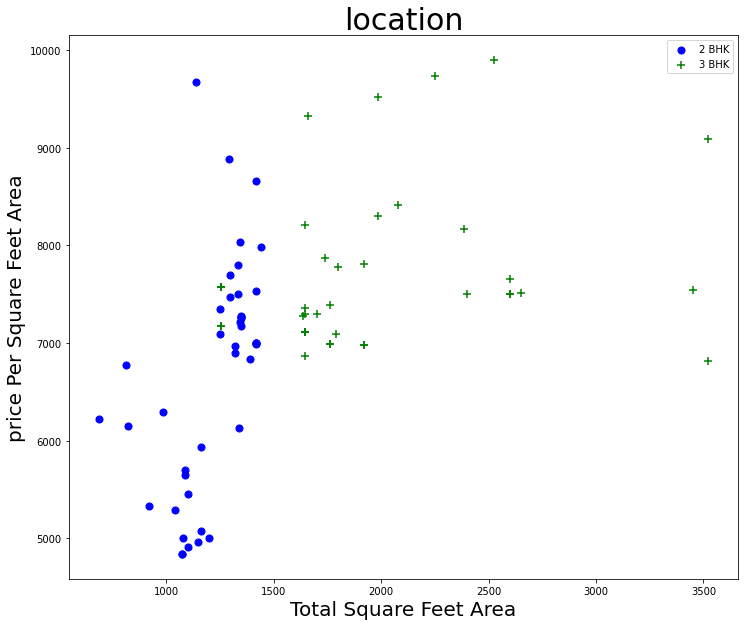

In [48]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

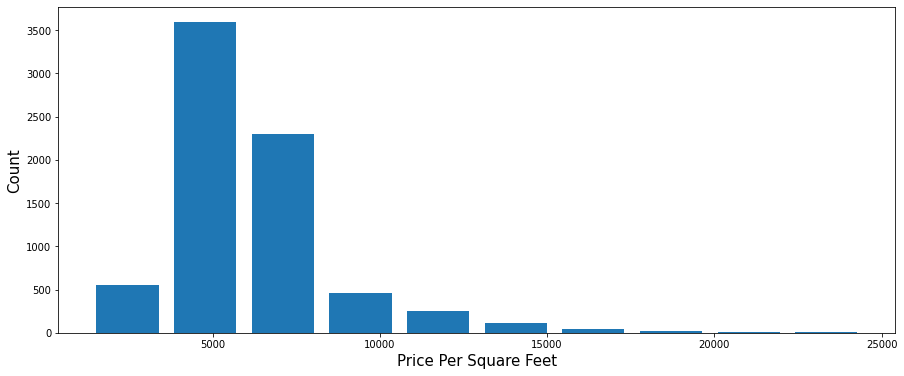

In [49]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (15,6)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Square Feet", size=15)
plt.ylabel("Count", size=15)

In [50]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [51]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

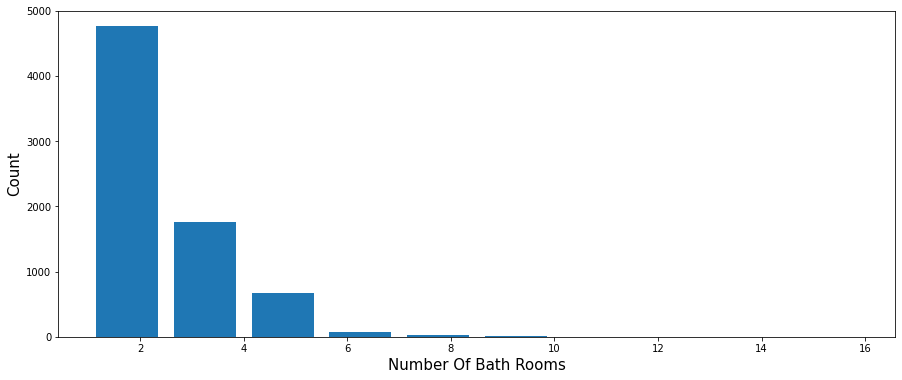

In [52]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel("Number Of Bath Rooms", size=15)
plt.ylabel("Count",size=15)

In [53]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [54]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

## Build Machine Learning Model

In [55]:
df10 = df9.drop(['size','price_per_sqft'], axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [56]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')], axis='columns')
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df12.shape

(7251, 245)

In [60]:
X = df12.drop('price', axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [63]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test, y_test)

0.845227769787428

In [64]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [65]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'lenar_regression': {
            'model': LinearRegression(),
            'params': {'normalize': [True, False]}
        },
        'lasso' : {
            'model': Lasso(),
            'params': { 'alpha': [1,2], 'selection':['random', 'cyclic'] }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': { 'criterion': ['mse', 'friedman_mse'], 'splitter': ['best','random'] }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_scores': gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_scores', 'best_params'])


find_best_model_using_gridsearchcv(X,y)

,model,best_scores,best_params
0,lenar_regression,0.818354,{'normalize': False}
1,lasso,0.687478,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.710359,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [75]:
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [97]:
np.where(X.columns == "2nd Phase Judicial Layout")[0][0]

5